In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast
import numpy as np
import matplotlib.pyplot as plt
import os

DATA_DIR = 'E:\Projects\ISL'

In [2]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_split=VALIDATION_SPLIT,
    subset='training',
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=VALIDATION_SPLIT,
    subset='validation',
    seed=123
)

Found 3780 files belonging to 35 classes.
Using 3024 files for training.
Found 3780 files belonging to 35 classes.
Using 756 files for validation.


In [4]:
class_names = train_ds.class_names
NUM_CLASSES = len(class_names)
print(f"Detected {NUM_CLASSES} classes: {class_names}")

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),
], name="data_augmentation")


Detected 35 classes: ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


C:\Users\tanis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 59s 447ms/step - accuracy: 0.0705 - loss: 3.4272 - val_accuracy: 0.3320 - val_loss: 2.3013
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 42s 443ms/step - accuracy: 0.3952 - loss: 1.9629 - val_accuracy: 0.9788 - val_loss: 0.2206
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 42s 443ms/step - accuracy: 0.6837 - loss: 0.9740 - val_accuracy: 0.9246 - val_loss: 0.2146
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 39s 409ms/step - accuracy: 0.7895 - loss: 0.6333 - val_accuracy: 0.9921 - val_loss: 0.0944
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 38s 398ms/step - accuracy: 0.8711 - loss: 0.3880 - val_accuracy: 0.9947 - val_loss: 0.0628
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 36s 382ms/step - accuracy: 0.8960 - loss: 0.3320 - val_accuracy: 0.9563 - val_loss: 0.0591
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 34s 359ms/step - accuracy: 0.9344 - loss: 0.1932 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 38s 396ms/step - accuracy: 0.9461 - loss: 0.1647 - val_accu

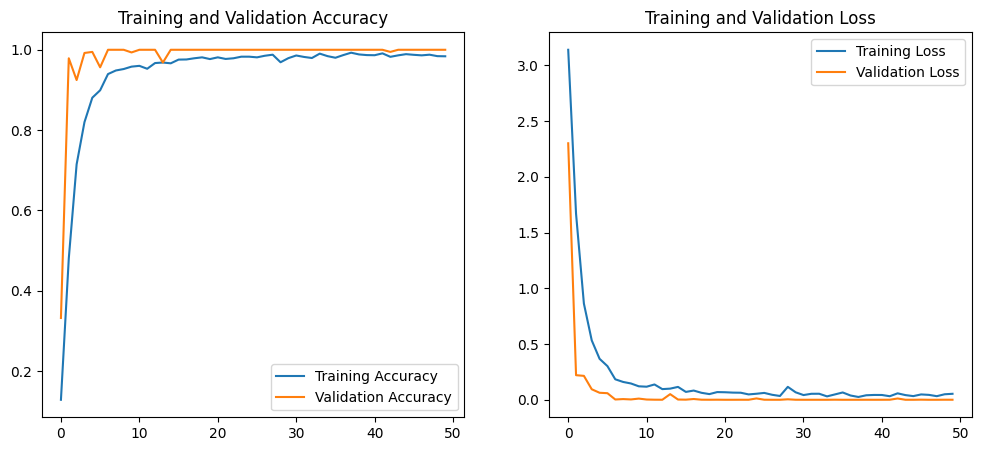

Model saved as 'ISL.keras'


In [5]:
model = Sequential([
    data_augmentation,
    Rescaling(1./255), 
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

EPOCHS = 50

history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model.save('ISL.keras')
print("Model saved as 'ISL.keras'")

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step

Predicted class: 6
Confidence: 100.00%


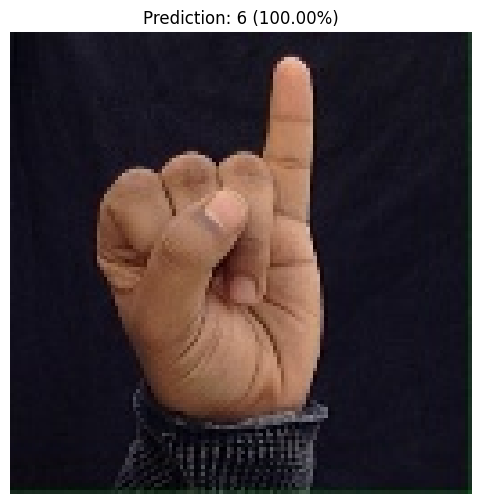

In [6]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ISL.keras' 
IMAGE_PATH = "E:\\Projects\\ISL_Test\\6_Test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step

Predicted class: 7
Confidence: 100.00%


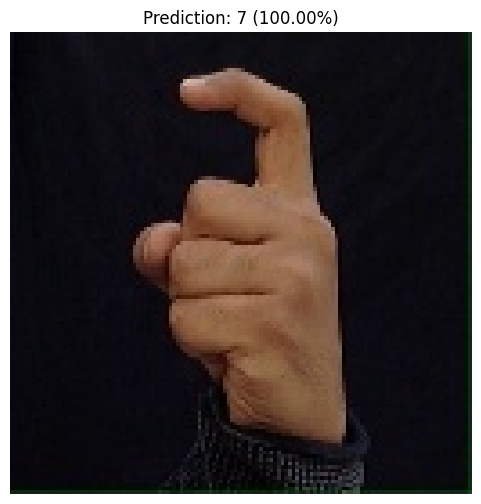

In [7]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ISL.keras' 
IMAGE_PATH = "E:\\Projects\\ISL_Test\\7_Test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step

Predicted class: 8
Confidence: 100.00%


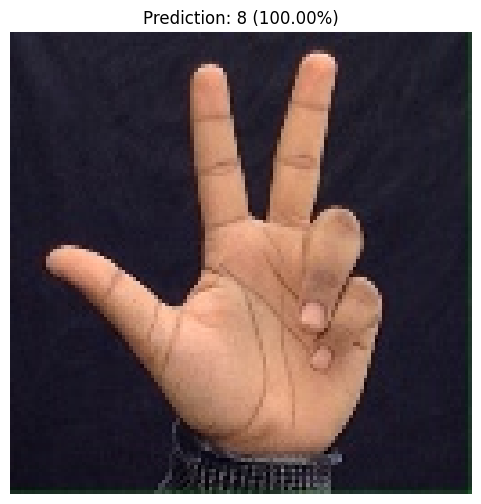

In [8]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ISL.keras' 
IMAGE_PATH = "E:\\Projects\\ISL_Test\\8_Test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step

Predicted class: 9
Confidence: 100.00%


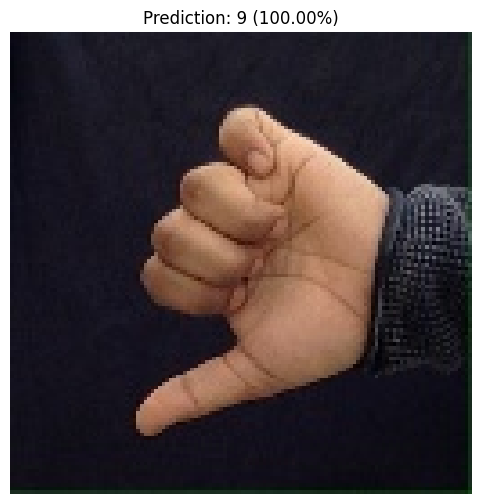

In [9]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ISL.keras' 
IMAGE_PATH = "E:\\Projects\\ISL_Test\\9_Test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step

Predicted class: T
Confidence: 99.84%


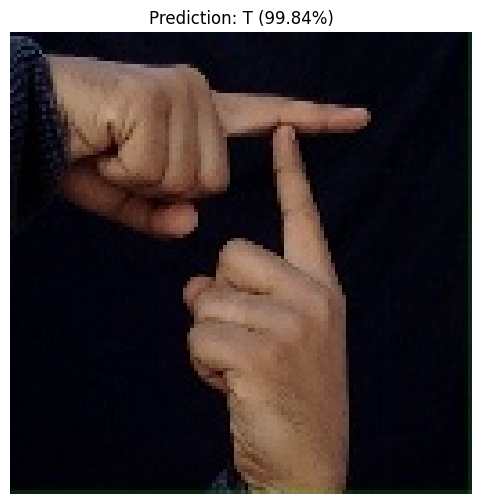

In [10]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ISL.keras' 
IMAGE_PATH = "E:\\Projects\\ISL_Test\\T_Test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step

Predicted class: A
Confidence: 100.00%


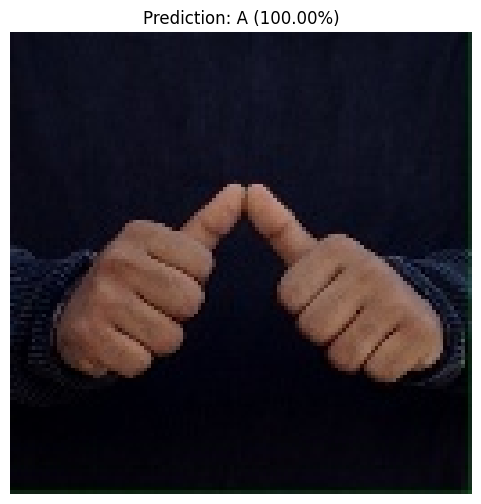

In [11]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ISL.keras' 
IMAGE_PATH = "E:\\Projects\\ISL_Test\\A_Test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step

Predicted class: N
Confidence: 100.00%


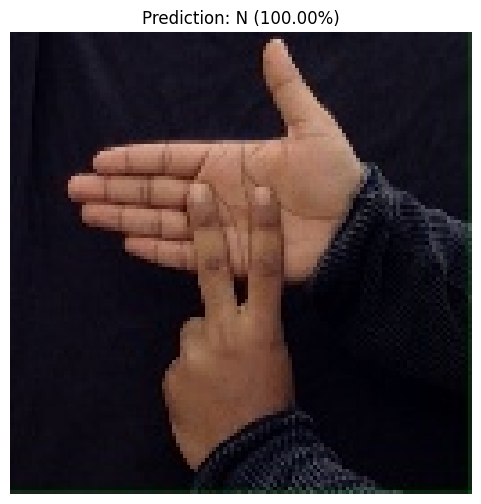

In [12]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ISL.keras' 
IMAGE_PATH = "E:\\Projects\\ISL_Test\\N_Test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step

Predicted class: I
Confidence: 100.00%


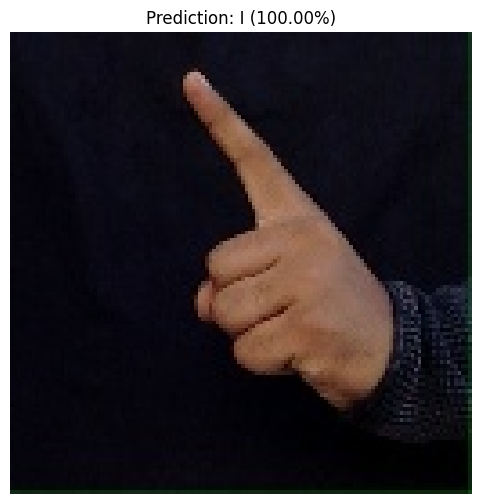

In [13]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ISL.keras' 
IMAGE_PATH = "E:\\Projects\\ISL_Test\\I_Test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step

Predicted class: S
Confidence: 100.00%


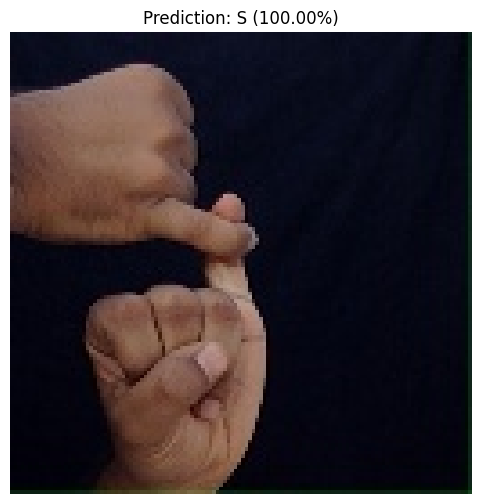

In [14]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ISL.keras' 
IMAGE_PATH = "E:\\Projects\\ISL_Test\\S_Test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step

Predicted class: H
Confidence: 100.00%


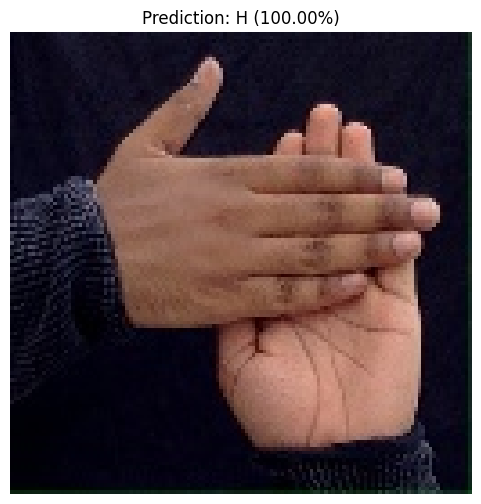

In [15]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ISL.keras' 
IMAGE_PATH = "E:\\Projects\\ISL_Test\\H_Test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()

Configured to use CPU only.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step

Predicted class: Q
Confidence: 100.00%


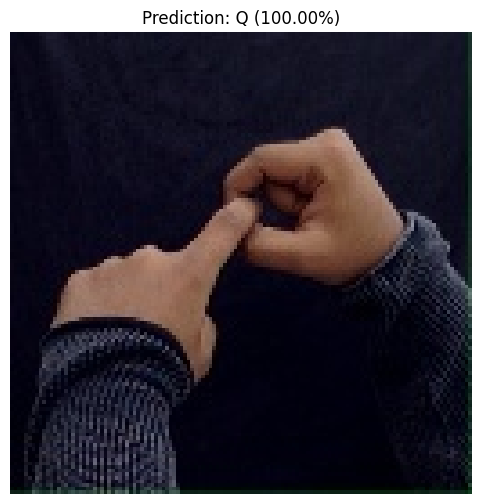

In [16]:
#Tester 

tf.config.set_visible_devices([], 'GPU')
print("Configured to use CPU only.")

MODEL_PATH = 'ISL.keras' 
IMAGE_PATH = "E:\\Projects\\ISL_Test\\Q_Test.jpg"

IMAGE_SIZE = (128, 128) 

CLASS_NAMES = sorted(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

model = tf.keras.models.load_model(MODEL_PATH)

def preprocess_image(image_path, target_size):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_image_array = preprocess_image(IMAGE_PATH, IMAGE_SIZE)

predictions = model.predict(test_image_array)

predicted_probabilities = predictions[0] 
predicted_class_index = np.argmax(predicted_probabilities)
predicted_class_name = CLASS_NAMES[predicted_class_index]
confidence = predicted_probabilities[predicted_class_index] * 100

print(f"\nPredicted class: {predicted_class_name}")
print(f"Confidence: {confidence:.2f}%")

plt.figure(figsize=(6, 6))
display_img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=IMAGE_SIZE)
plt.imshow(display_img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis('off')
plt.show()